In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving emotions.csv to emotions.csv


In [4]:
data = pd.read_csv('emotions.csv')
print(data.head())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

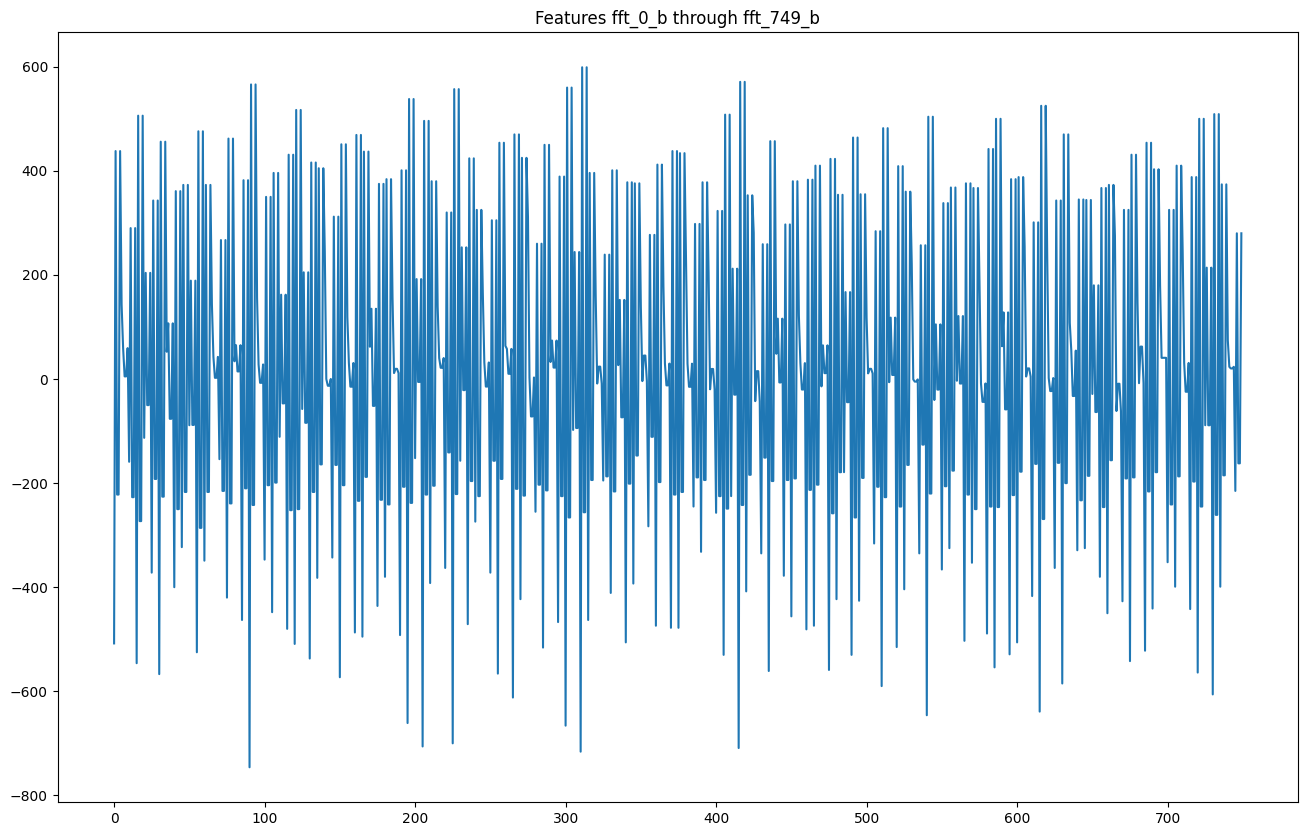

In [5]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Features fft_0_b through fft_749_b')
plt.show()

In [6]:
print("\nLabel distribution:")
print(data['label'].value_counts())


Label distribution:
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


In [7]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [12]:
def preprocess_inputs(df):
    df = df.copy()
    df['label'] = df['label'].replace(label_mapping)

    y = df['label'].copy()
    x = df.drop('label', axis=1).copy()

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)
    return x_train, x_test, y_train, y_test

In [13]:
x_train, x_test, y_train, y_test = preprocess_inputs(data)
print("\nTraining data sample:")
print(x_train.head())


Training data sample:
      # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
993       14.400      29.7    -112.0      18.5      22.9    -3.63000   
1851      13.700      22.8      21.5       8.4      27.1     3.27000   
1253      -0.765      24.7    -578.0      11.9      27.9    -1.44000   
1228      28.200      32.6      32.1      30.3      24.6    -0.00524   
1461      31.900      31.0      34.4      30.8      24.0    -4.74000   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  \
993      -2.2200      -2.180      -3.240       -4.04  ...      -50.0   
1851      1.1200       6.480       2.300        5.66  ...       74.2   
1253     -4.2000      -8.310      -4.340        4.04  ...     -803.0   
1228     -0.0699       1.680       0.266       -4.47  ...      167.0   
1461     -1.4000      -0.351      -1.830       -5.39  ...      130.0   

      fft_741_b  fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  \
993       150.0     -150.0     -150.0

/tmp/ipython-input-12-1885585467.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


In [15]:
from tensorflow.keras.layers import Lambda

inputs = tf.keras.Input(shape=(x_train.shape[1],))

# Use Lambda layer to apply tf.expand_dims
expand_dims = Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

# Continue with GRU layer
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2548)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 2548, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 2548, 256)      │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 652288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │     1,956,867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

GPU Available: []


/tmp/ipython-input-18-3942887706.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace(label_mapping)


Training model...
Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 960ms/step - accuracy: 0.6800 - loss: 0.8156 - val_accuracy: 0.8528 - val_loss: 0.9969 - learning_rate: 0.0010
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 934ms/step - accuracy: 0.8809 - loss: 0.3903 - val_accuracy: 0.8662 - val_loss: 0.9043 - learning_rate: 0.0010
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 937ms/step - accuracy: 0.8902 - loss: 0.3053 - val_accuracy: 0.7157 - val_loss: 0.8681 - learning_rate: 0.0010
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 877ms/step - accuracy: 0.8962 - loss: 0.2761 - val_accuracy: 0.7324 - val_loss: 0.8454 - learning_rate: 0.0010
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 899ms/step - accuracy: 0.9025 - loss: 0.2526 - val_accuracy: 0.6622 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 915ms/step - accuracy: 0.9163 - loss: 0.2267 - val_accuracy: 0.6522 - val_loss: 0.7969 - learning_rate: 0.0010
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 903ms/step - accuracy:

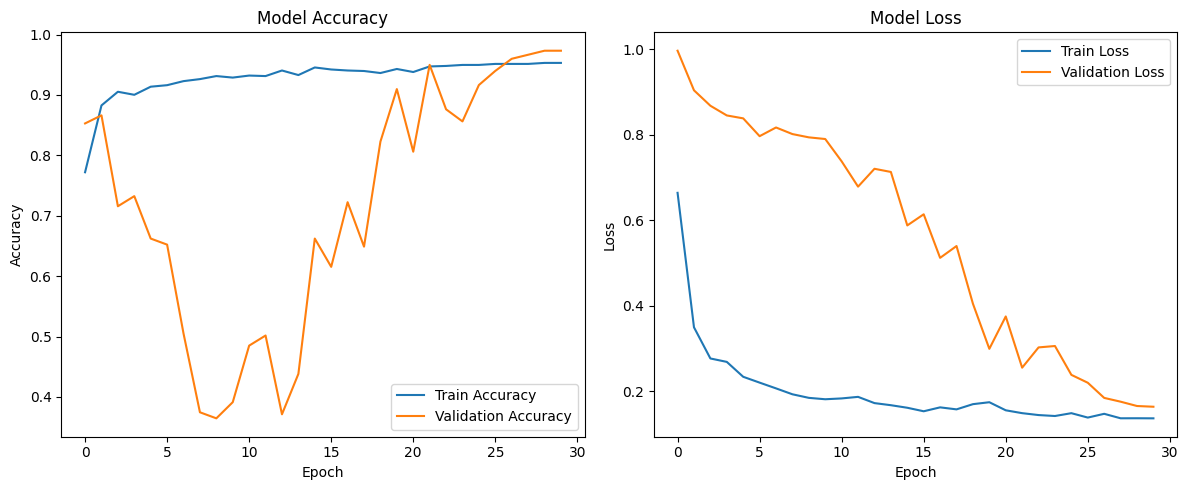

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


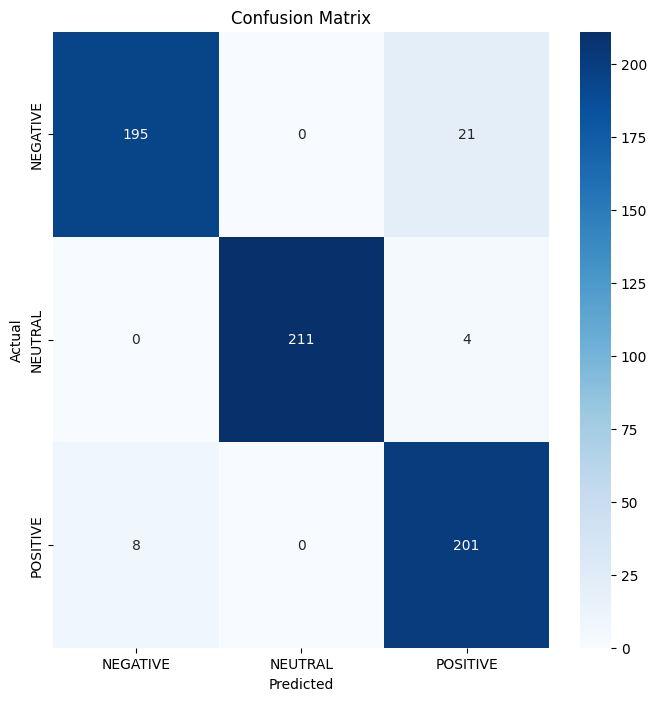

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.96      0.90      0.93       216
     NEUTRAL       1.00      0.98      0.99       215
    POSITIVE       0.89      0.96      0.92       209

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Enable GPU acceleration
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Data Loading and Preprocessing
def load_and_preprocess(filepath):
    # Load data
    data = pd.read_csv(filepath)

    # Label mapping
    label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
    data['label'] = data['label'].replace(label_mapping)

    # Feature/label separation
    y = data['label'].copy()
    X = data.drop('label', axis=1).copy()

    # Normalize features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return train_test_split(X, y, test_size=0.3, random_state=42)

# Load your dataset (replace with your file path)
x_train, x_test, y_train, y_test = load_and_preprocess('emotions.csv')

# Model Architecture - Using 1D CNN for faster training
def build_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Reshape for CNN
    x = tf.keras.layers.Reshape((input_shape[0], 1))(inputs)

    # CNN layers
    x = tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)

    x = tf.keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Dense layers
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build and train model
model = build_model((x_train.shape[1],))

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2
)

# Training
print("Training model...")
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=30,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.3f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix and Classification Report
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'],
            yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(clr)